In [43]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

___

# Loading Data

### Binary Classifiers

In [44]:
b_pfm_pre = pd.read_pickle("../../pickles/binary/pfm_pre.pkl")
b_pfm_basic = pd.read_pickle("../../pickles/binary/pfm_basic.pkl")
b_pfm_corr = pd.read_pickle("../../pickles/binary/pfm_corr.pkl")

### Multiclass Classifiers (Categorical Cross Entropy)

In [45]:
m_cat_pfm_pre = pd.read_pickle("../../pickles/multiclass_categorical/pfm_pre.pkl")
m_cat_pfm_basic = pd.read_pickle("../../pickles/multiclass_categorical/pfm_basic.pkl")
m_cat_pfm_corr = pd.read_pickle("../../pickles/multiclass_categorical/pfm_corr.pkl")

___

# Graphs

### Helper Function

In [46]:
def load_metric(classifier, metric):
    if classifier == "Binary":
        metrics = pd.DataFrame([b_pfm_pre[metric],
                            b_pfm_basic[metric],
                            b_pfm_corr[metric]])
    elif classifier == "Multiclass":
        metrics = pd.DataFrame([m_cat_pfm_pre[metric],
                            m_cat_pfm_basic[metric],
                            m_cat_pfm_corr[metric]])
    elif classifier == "OvO":
        metrics = pd.DataFrame([m_ovo_pfm_pre[metric],
                            m_ovo_pfm_basic[metric],
                            m_ovo_pfm_corr[metric]])
    else:
        metrics = pd.DataFrame([m_ovr_pfm_pre[metric],
                            m_ovr_pfm_basic[metric],
                            m_ovr_pfm_corr[metric]])

    metrics = metrics.T
    metrics.columns = ["Preprocessing", "Basic_Methods", "Correlation"]

    return metrics

## Accuracy

In [47]:
b_accuracies = load_metric("Binary", "Accuracy")
m_cat_accuracies = load_metric("Multiclass", "Accuracy")

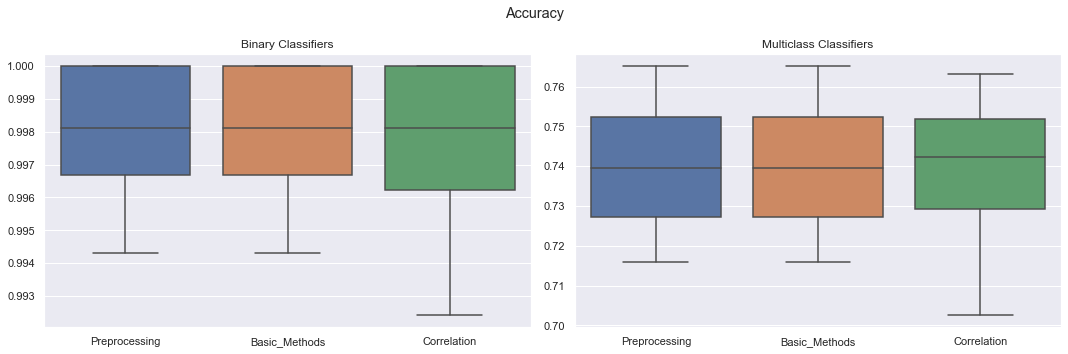

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Accuracy')

sns.boxplot(ax = axes[0], data=b_accuracies)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_accuracies)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

## Precision

In [49]:
b_precisions = load_metric("Binary", "Precision")
m_cat_precisions = load_metric("Multiclass", "Precision")

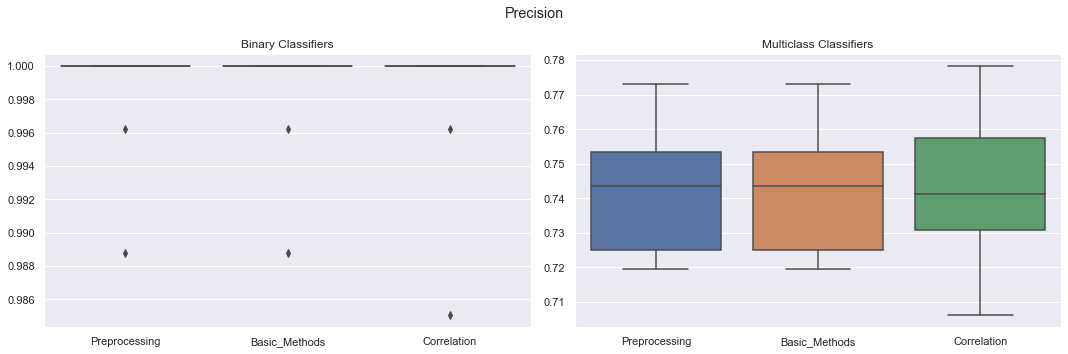

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Precision')

sns.boxplot(ax = axes[0], data=b_precisions)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_precisions)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

## Recall

In [51]:
b_recalls = load_metric("Binary", "Recall")
m_cat_recalls = load_metric("Multiclass", "Recall")

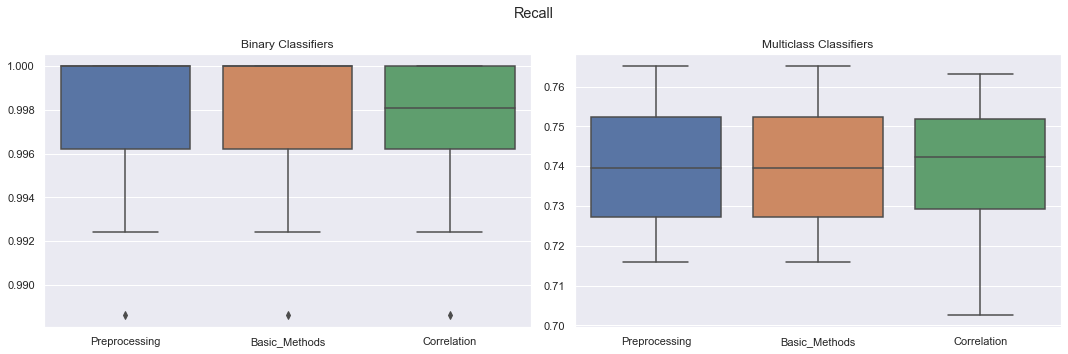

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Recall')

sns.boxplot(ax = axes[0], data=b_recalls)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_recalls)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

## F1 Score

In [53]:
b_f1_scores = load_metric("Binary", "F1_Score")
m_cat_f1_scores = load_metric("Multiclass", "F1_Score")

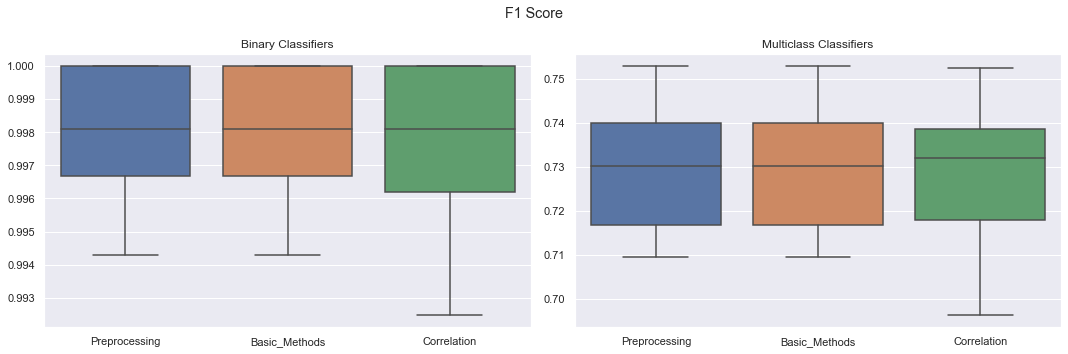

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('F1 Score')

sns.boxplot(ax = axes[0], data=b_f1_scores)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_f1_scores)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

___

## Fit Times

In [55]:
b_fit_times = load_metric("Binary", "Fit_Time")
m_cat_fit_times = load_metric("Multiclass", "Fit_Time")

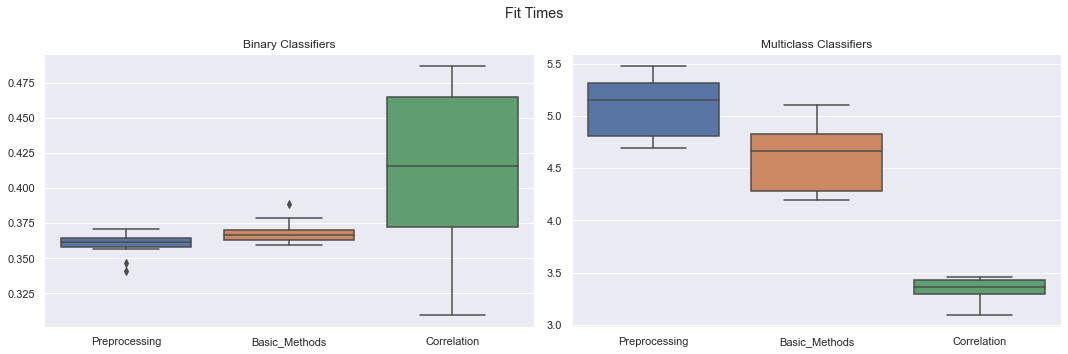

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Fit Times')

sns.boxplot(ax = axes[0], data=b_fit_times)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_fit_times)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

## Feature Selection vs Training Times

In [57]:
bin_times = pd.DataFrame()
bin_times["Feature Selection"] = load_metric("Binary", "FS_Time").mean()
bin_times["Training Classifier"] = load_metric("Binary", "Train_Time").mean()
bin_times

,Feature Selection,Training Classifier
Preprocessing,0.000000,0.359419
Basic_Methods,0.031854,0.336793
Correlation,0.130020,0.285022


In [58]:
multi_times = pd.DataFrame()
multi_times["Feature Selection"] = load_metric("Multiclass", "FS_Time").mean()
multi_times["Training Classifier"] = load_metric("Multiclass", "Train_Time").mean()
multi_times

,Feature Selection,Training Classifier
Preprocessing,0.000000,5.085734
Basic_Methods,0.036777,4.570573
Correlation,0.126924,3.216010


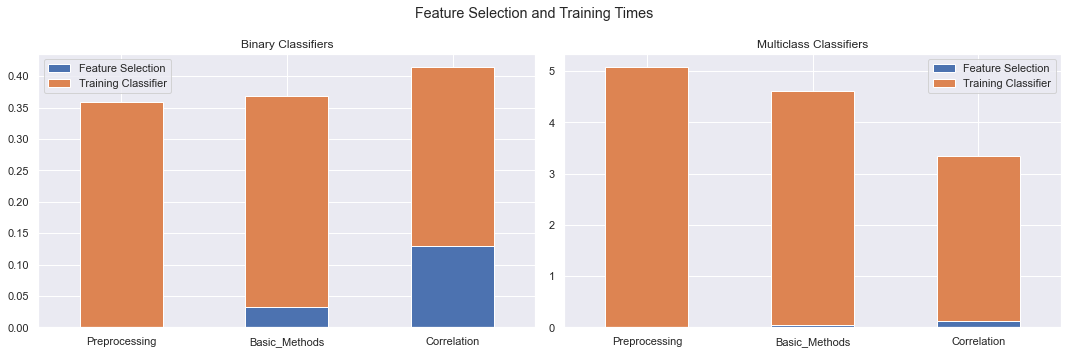

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Feature Selection and Training Times')

bin_times.plot.bar(ax = axes[0], stacked=True, rot=0)
axes[0].set_title('Binary Classifiers')

multi_times.plot.bar(ax = axes[1], stacked=True, rot=0)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

## Predict Times

In [60]:
b_predict_times = load_metric("Binary", "Predict_Time")
m_cat_predict_times = load_metric("Multiclass", "Predict_Time")

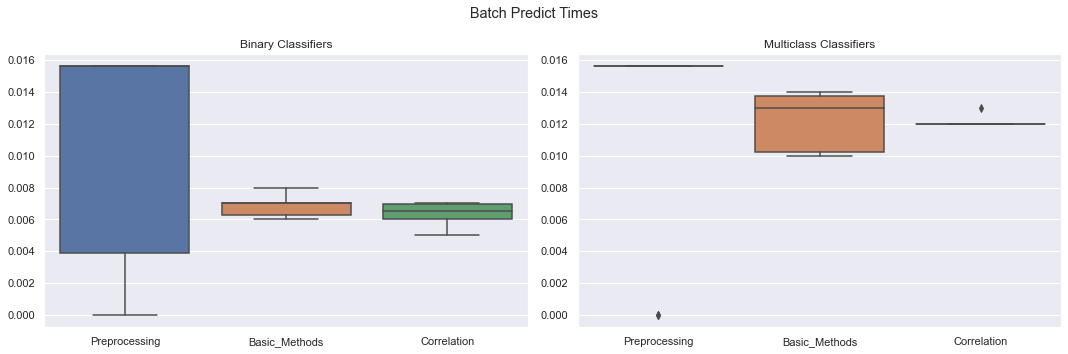

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Batch Predict Times')

sns.boxplot(ax = axes[0], data=b_predict_times)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_predict_times)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()

## Score Times

In [62]:
b_score_times = load_metric("Binary", "Score_Time")
m_cat_score_times = load_metric("Multiclass", "Score_Time")

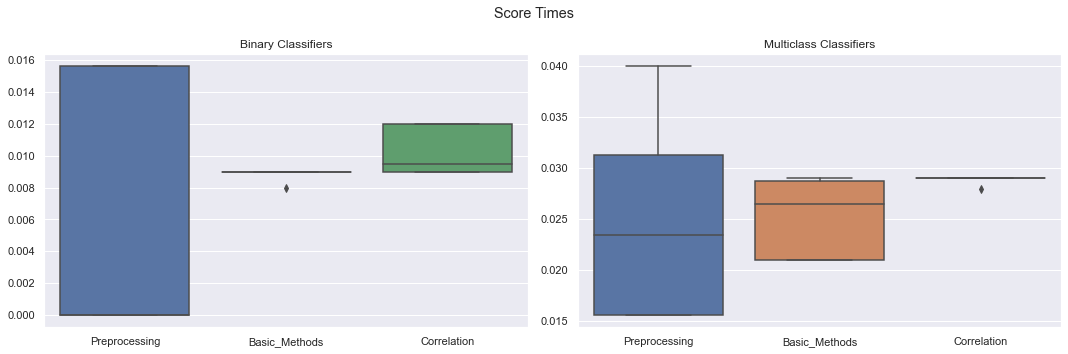

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Score Times')

sns.boxplot(ax = axes[0], data=b_score_times)
axes[0].set_title('Binary Classifiers')

sns.boxplot(ax = axes[1], data=m_cat_score_times)
axes[1].set_title('Multiclass Classifiers')

fig.tight_layout()